# U.S. Medical Insurance Costs

In [1]:
# import data using csv module
import csv
with open('insurance.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count=0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            line_count +=1
    print(f'Processed {line_count} lines.')

Column names are age, sex, bmi, children, smoker, region, charges
Processed 1339 lines.


In [2]:
# Load into pandas dataframe
import pandas as pd
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

# Exploratory Data Analysis

In [7]:
# Check NaNs
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.shape

(1338, 7)

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Check for any obviuos correlation (no correlation shown)
corr = data.corr()

<AxesSubplot:>

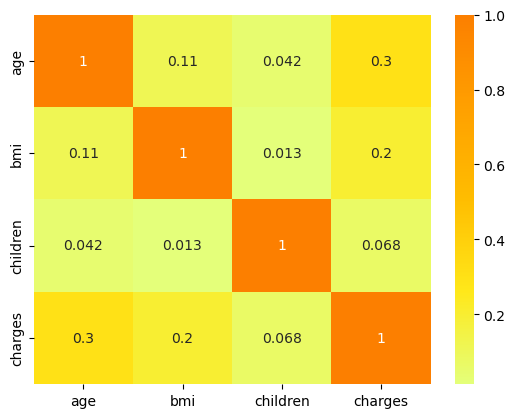

In [13]:
sns.heatmap(corr, cmap = 'Wistia', annot = True)

### Check inclusiveness: gender, age group and locations

<AxesSubplot:xlabel='sex'>

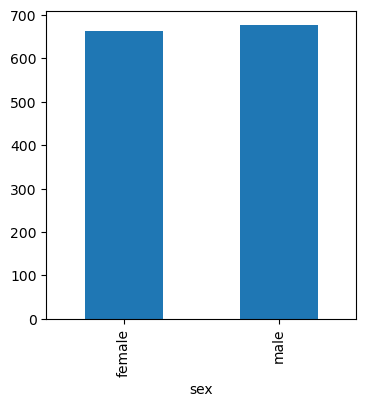

In [26]:
plt.figure(figsize=(4,4))
data.groupby(['sex'])['sex'].count().plot.bar()

<AxesSubplot:ylabel='Density'>

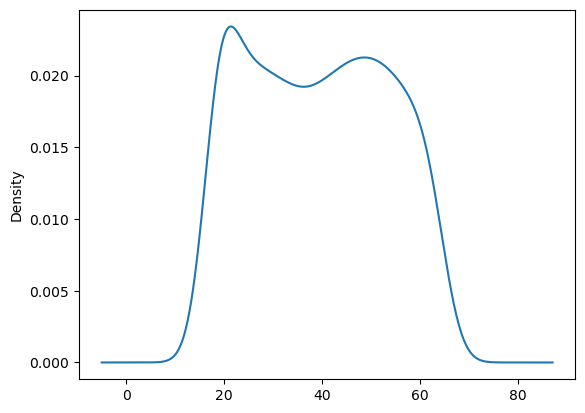

In [44]:
data['age'].plot.density()

In [39]:
data[(data['age']>=18) & (data['age']<25)].shape

(278, 7)

In [35]:
data[(data['age']>=25) & (data['age']<=35)].shape

(296, 7)

In [40]:
data[(data['age']>=30) & (data['age']<=40)].shape

(284, 7)

In [38]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='region'>

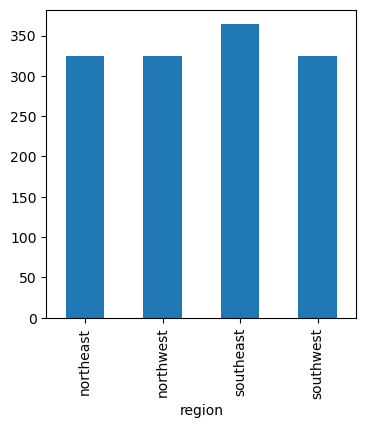

In [28]:
plt.figure(figsize=(4,4))
data.groupby(['region'])['region'].count().plot.bar()

Conclusion: the data set is inclusive in terms of gender and location.

### Distribution of Insurance Charges

C:\Users\alina\anaconda3\envs\SAF_prescreening\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alina\anaconda3\envs\SAF_prescreening\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


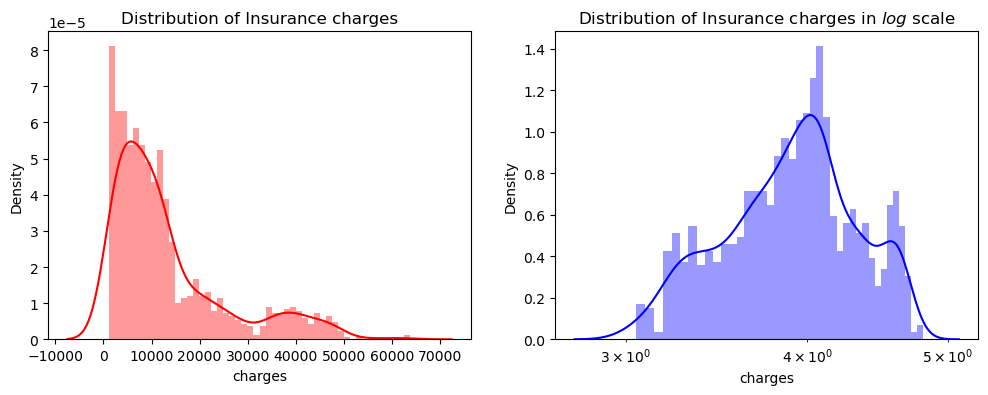

In [17]:
f = plt.figure(figsize = (12, 4))

ax = f.add_subplot(121)
sns.distplot(data['charges'], bins=50, color = 'r', ax=ax)
ax.set_title('Distribution of Insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']), bins=40, color = 'b', ax=ax)
ax.set_title('Distribution of Insurance charges in $log$ scale')
ax.set_xscale('log')

We will be applying log scale for targeted variable charges for future analysis. The left figure shows how data is right skewed.

### How gender and being a smoker or non-smoker affect the cost of insurance?

Text(0.5, 1.0, 'Violin plot of CHarges vs Smoker')

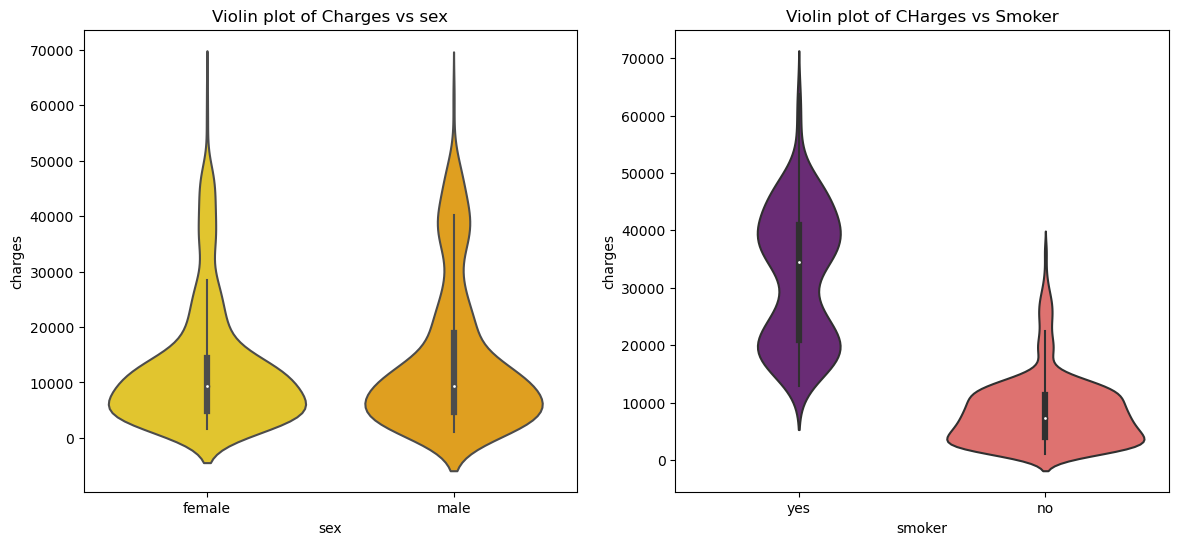

In [19]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y = 'charges', data = data, palette = 'Wistia', ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x = 'smoker', y = 'charges', data=data, palette = 'magma', ax=ax)
ax.set_title('Violin plot of CHarges vs Smoker')

For both genders the insurance cost is in the same range. As expected, the plot on the right shows a connection between the cost and being a smoker/non-smoker. It is important to check even obviuos relationships in the dataset, to have a feeling about the reliability of data source.

### How number of children affects the cost of insurance?

In [46]:
data.groupby('children').agg(['mean', 'min', 'max'])['charges']

C:\Users\alina\AppData\Local\Temp\ipykernel_24256\3596110172.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('children').agg(['mean', 'min', 'max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


In [47]:
data.groupby('children')['children'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Box plot of charges vs children')

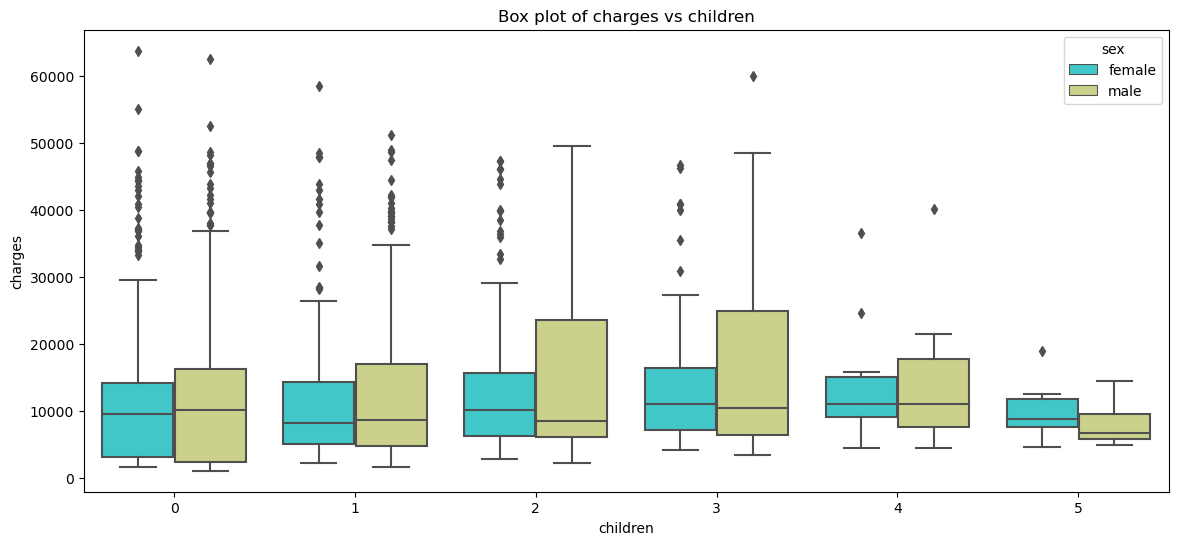

In [49]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y = 'charges', hue = 'sex', data = data, palette = 'rainbow')
plt.title('Box plot of charges vs children')

### How location affects the insurance charges?

Text(0.5, 1.0, 'Box plot of charges vs region')

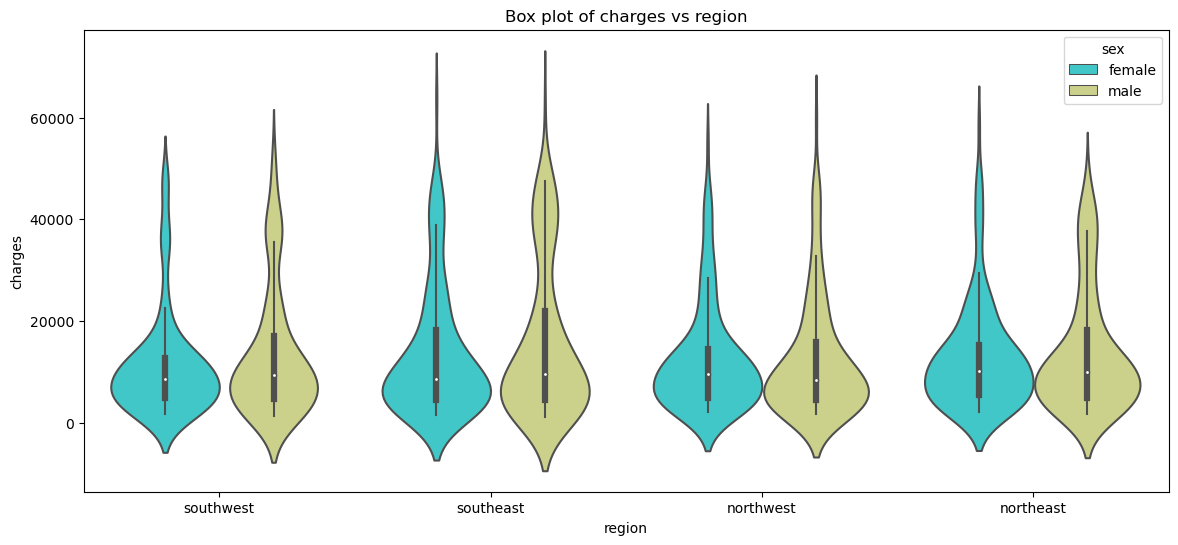

In [50]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y = 'charges', hue = 'sex', data = data, palette = 'rainbow')
plt.title('Box plot of charges vs region')

### Scatter plots

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

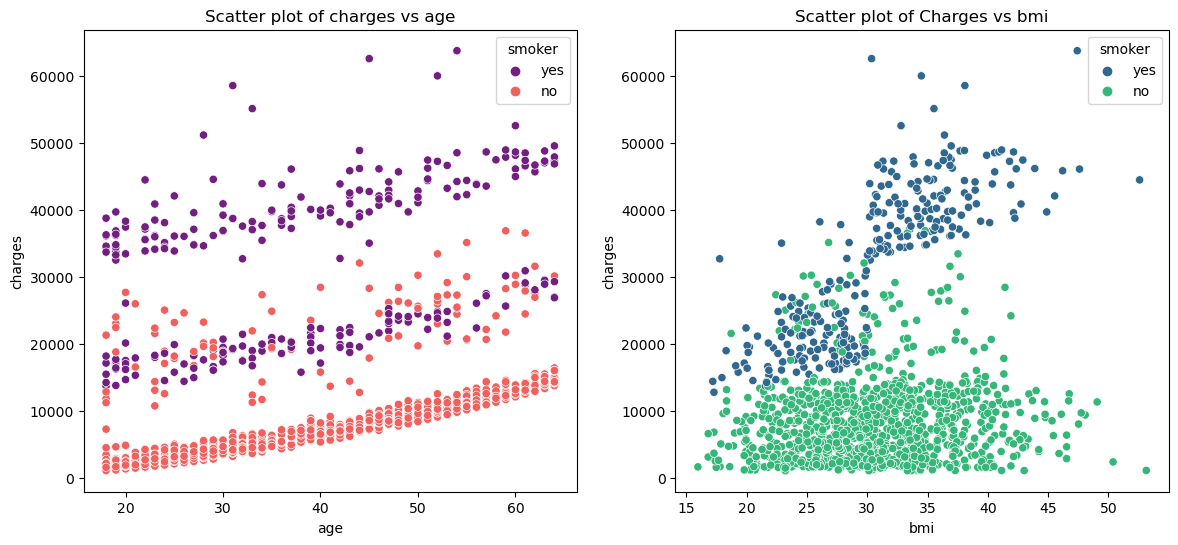

In [51]:
f = plt.figure(figsize=(14, 6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=data, palette = 'magma', hue = 'smoker', ax=ax)
ax.set_title('Scatter plot of charges vs age')

ax=f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=data, palette='viridis', hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

From the right: people with higher bmi have visibly higher insurance cost if they are smokers. With age insurance cost is growing approx with the same pace, though for smokers it is higher again.

### Label encoding

In [ ]:
Categorical data must be converted to number before applying any machine learning model.